In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('jxie585_722').getOrCreate()

In [2]:
df = spark.read.load("./covid.csv", format="csv", header="true")
print("rows: " + str(df.count()), "columns: " + str(len(df.columns)))
df.show()

rows: 5165 columns: 15
+---+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|_c0|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+---+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|  1|1000000001|  male| 50|  Korea|   Seoul|  Gangseo-gu|     overseas inflow|       null|            75|        2020-01-22|    2020-01-23|   2020-02-05|         null|released|
|  2|1000000002|  male| 30|  Korea|   Seoul| Jungnang-gu|     overseas inflow|       null|            31|              null|    2020-01-30|   2020-03-02|         null|released|
|  3|1000000003|  male| 50|  Korea|   Seoul|   Jongno-gu|contact with patient| 2002000001|  

In [3]:
df.columns

['_c0',
 'patient_id',
 'sex',
 'age',
 'country',
 'province',
 'city',
 'infection_case',
 'infected_by',
 'contact_number',
 'symptom_onset_date',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state']

In [4]:
df.describe().show()

+-------+------------------+--------------------+------+------------------+----------+--------+--------------+--------------------+--------------------+--------------------+------------------+--------------+-------------+-------------+--------+
|summary|               _c0|          patient_id|   sex|               age|   country|province|          city|      infection_case|         infected_by|      contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+-------+------------------+--------------------+------+------------------+----------+--------+--------------+--------------------+--------------------+--------------------+------------------+--------------+-------------+-------------+--------+
|  count|              5165|                5165|  4043|              5165|      5165|    5165|          5071|                4246|                1346|                 791|               690|          5162|         1587|           66|    5165|
|   mean|           

In [6]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- patient_id: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- country: string (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- infected_by: string (nullable = true)
 |-- contact_number: string (nullable = true)
 |-- symptom_onset_date: string (nullable = true)
 |-- confirmed_date: string (nullable = true)
 |-- released_date: string (nullable = true)
 |-- deceased_date: string (nullable = true)
 |-- state: string (nullable = true)



In [7]:
df.count()

5165

In [8]:
df.na.fill("NO VALUE").show()

+---+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|_c0|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+---+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|  1|1000000001|  male| 50|  Korea|   Seoul|  Gangseo-gu|     overseas inflow|   NO VALUE|            75|        2020-01-22|    2020-01-23|   2020-02-05|     NO VALUE|released|
|  2|1000000002|  male| 30|  Korea|   Seoul| Jungnang-gu|     overseas inflow|   NO VALUE|            31|          NO VALUE|    2020-01-30|   2020-03-02|     NO VALUE|released|
|  3|1000000003|  male| 50|  Korea|   Seoul|   Jongno-gu|contact with patient| 2002000001|            17|          

In [9]:
from pyspark.sql.functions import *


df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas().transpose()

,0
_c0,0
patient_id,0
sex,1122
age,0
country,0
province,0
city,94
infection_case,919
infected_by,3819
contact_number,4374


In [10]:
data = df.select(df.age,df.sex,df.infection_case,df.province,df.state)
data.show()

+---+------+--------------------+--------+--------+
|age|   sex|      infection_case|province|   state|
+---+------+--------------------+--------+--------+
| 50|  male|     overseas inflow|   Seoul|released|
| 30|  male|     overseas inflow|   Seoul|released|
| 50|  male|contact with patient|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 20|female|contact with patient|   Seoul|released|
| 50|female|contact with patient|   Seoul|released|
| 20|  male|contact with patient|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 30|  male|     overseas inflow|   Seoul|released|
| 60|female|contact with patient|   Seoul|released|
| 50|female|     overseas inflow|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 80|  male|contact with patient|   Seoul|deceased|
| 60|female|contact with patient|   Seoul|released|
| 70|  male|    Seongdong-gu APT|   Seoul|released|
| 70|  male|contact with patient|   Seoul|released|
| 70|  male|

In [11]:
data.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- province: string (nullable = true)
 |-- state: string (nullable = true)



In [12]:
data.select(data.age).na.drop()

DataFrame[age: string]

In [13]:
from pyspark.sql.functions import col
from pyspark.sql.functions import when


data = data.withColumn('province_id',when(df.province == "Seoul",0).otherwise(1))
data = data.withColumn('sex_id',when(df.sex == "male",0).otherwise(1))
data = data.withColumn('state_id',when(df.state == "released",0).when(df.state == "deceased",1).when(df.state == "isolated",2))

data.show()

+---+------+--------------------+--------+--------+-----------+------+--------+
|age|   sex|      infection_case|province|   state|province_id|sex_id|state_id|
+---+------+--------------------+--------+--------+-----------+------+--------+
| 50|  male|     overseas inflow|   Seoul|released|          0|     0|       0|
| 30|  male|     overseas inflow|   Seoul|released|          0|     0|       0|
| 50|  male|contact with patient|   Seoul|released|          0|     0|       0|
| 20|  male|     overseas inflow|   Seoul|released|          0|     0|       0|
| 20|female|contact with patient|   Seoul|released|          0|     1|       0|
| 50|female|contact with patient|   Seoul|released|          0|     1|       0|
| 20|  male|contact with patient|   Seoul|released|          0|     0|       0|
| 20|  male|     overseas inflow|   Seoul|released|          0|     0|       0|
| 30|  male|     overseas inflow|   Seoul|released|          0|     0|       0|
| 60|female|contact with patient|   Seou

In [14]:
from pyspark.sql.functions import corr

data_corr = data.select(data.age,data.province_id,data.sex_id,data.state_id)
for i in data_corr.columns:
    for j in data_corr.columns:
        if(i == j):
            next
        print(data_corr.select(corr(i,j)).toPandas())
#data.select(corr("age","sex_id")).show()

   corr(age, age)
0             1.0
   corr(age, province_id)
0                  0.0831
   corr(age, sex_id)
0           0.118521
   corr(age, state_id)
0             0.078254
   corr(province_id, age)
0                  0.0831
   corr(province_id, province_id)
0                             1.0
   corr(province_id, sex_id)
0                   -0.17826
   corr(province_id, state_id)
0                     0.212677
   corr(sex_id, age)
0           0.118521
   corr(sex_id, province_id)
0                   -0.17826
   corr(sex_id, sex_id)
0                   1.0
   corr(sex_id, state_id)
0                0.071657
   corr(state_id, age)
0             0.078254
   corr(state_id, province_id)
0                     0.212677
   corr(state_id, sex_id)
0                0.071657
   corr(state_id, state_id)
0                       1.0


In [15]:
data.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- province: string (nullable = true)
 |-- state: string (nullable = true)
 |-- province_id: integer (nullable = false)
 |-- sex_id: integer (nullable = false)
 |-- state_id: integer (nullable = true)



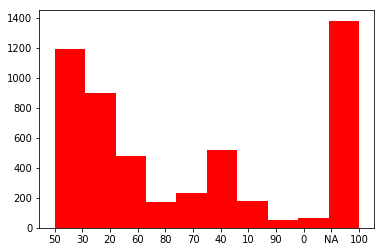

In [19]:
import matplotlib.pyplot as plt

age = [v.age for v in df.select('age').collect()]
plt.hist(age, color='red',label='age')
plt.show()

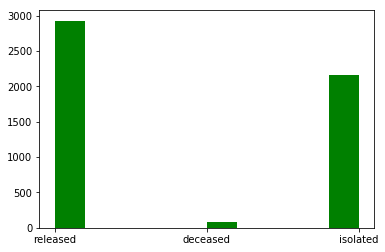

In [17]:
state = [v.state for v in df.select('state').collect()]
plt.hist(state, color='green',label='state')
plt.show()

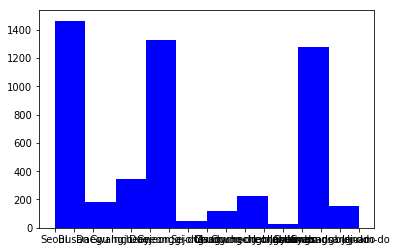

In [18]:
province = [v.province for v in df.select('province').collect()]
plt.hist(province, color='blue',label='province')
plt.show()

In [28]:
import pyspark.sql.functions as f
from pyspark.sql.functions import *

data = df.select(df.age,df.sex,df.infection_case,df.province,df.state)
bounds = {
    c: dict(zip(["q1", "q3"], data.approxQuantile(c, [0.25, 0.75], 0)))
    for c in [i for i in data.columns if i not in ('age', "state", "sex", "province", "infection_case")]
}
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)

data.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in [i for i in data.columns if i not in ('age', "state", "sex", "province", "infection_case")]
    ]
).show()

+---+------+--------------------+--------+--------+
|age|   sex|      infection_case|province|   state|
+---+------+--------------------+--------+--------+
| 50|  male|     overseas inflow|   Seoul|released|
| 30|  male|     overseas inflow|   Seoul|released|
| 50|  male|contact with patient|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 20|female|contact with patient|   Seoul|released|
| 50|female|contact with patient|   Seoul|released|
| 20|  male|contact with patient|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 30|  male|     overseas inflow|   Seoul|released|
| 60|female|contact with patient|   Seoul|released|
| 50|female|     overseas inflow|   Seoul|released|
| 20|  male|     overseas inflow|   Seoul|released|
| 80|  male|contact with patient|   Seoul|deceased|
| 60|female|contact with patient|   Seoul|released|
| 70|  male|    Seongdong-gu APT|   Seoul|released|
| 70|  male|contact with patient|   Seoul|released|
| 70|  male|

In [26]:
import pandas as pd
from pyspark.mllib.fpm import FPGrowth

source = pd.read_csv("./covid.csv")
value = {"sex":"male"}
source = source.fillna(value=value)
data = source[['age','sex','infection_case', 'province','state']]
list = data.values.tolist()
sc = spark.sparkContext
rdd = sc.parallelize(list, 4)
model = FPGrowth.train(rdd, minSupport=0.15, numPartitions=10)
result = model.freqItemsets().toDF().toPandas()
print(result)

                                  items  freq
0                     [overseas inflow]   840
1                                [male]  2947
2                            [released]  2929
3                      [released, male]  1527
4                              [female]  2218
5                    [female, released]  1402
6                            [isolated]  2158
7                    [isolated, female]   788
8                      [isolated, male]  1370
9                [contact with patient]  1610
10     [contact with patient, isolated]  1063
11         [contact with patient, male]   890
12                              [Seoul]  1312
13                    [Seoul, released]   985
14                        [Seoul, male]  1000
15                   [Gyeongsangbuk-do]  1254
16         [Gyeongsangbuk-do, released]  1081
17                        [Gyeonggi-do]  1208
18  [Gyeonggi-do, contact with patient]   777
19              [Gyeonggi-do, isolated]  1146
20                  [Gyeonggi-do, 

In [17]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint


source = pd.read_csv("./covid.csv")
value = {"sex":"male"}
source = source.fillna(value=value)
data = source[['age','sex','infection_case', 'province','state']]
list = data.values.tolist()
sc = spark.sparkContext
rdd = sc.parallelize(list)

train, test = rdd.randomSplit([0.7, 0.3], seed=12345)
print("train: " + str(train.count()), "test: " + str(test.count()))

train: 3559 test: 1606


In [34]:
for i in range(5):
    source = pd.read_csv("./covid.csv")
    value = {"sex":"male"}
    source = source.fillna(value=value)
    data = source[['age','sex','infection_case', 'province','state']]
    list = data.values.tolist()
    sc = spark.sparkContext
    rdd = sc.parallelize(list)
    model = FPGrowth.train(rdd, minSupport=0.15, numPartitions=10)
    result = model.freqItemsets().toDF().toPandas()
    print(result)


                                  items  freq
0                     [overseas inflow]   840
1                                [male]  2947
2                            [released]  2929
3                      [released, male]  1527
4                              [female]  2218
5                    [female, released]  1402
6                            [isolated]  2158
7                    [isolated, female]   788
8                      [isolated, male]  1370
9                [contact with patient]  1610
10     [contact with patient, isolated]  1063
11         [contact with patient, male]   890
12                              [Seoul]  1312
13                    [Seoul, released]   985
14                        [Seoul, male]  1000
15                   [Gyeongsangbuk-do]  1254
16         [Gyeongsangbuk-do, released]  1081
17                        [Gyeonggi-do]  1208
18  [Gyeonggi-do, contact with patient]   777
19              [Gyeonggi-do, isolated]  1146
20                  [Gyeonggi-do, 